In [1]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
import datetime
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 500)
# pd.set_option('display.max_rows', None)
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_csv('train.csv')
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,01-08-1988,Salaried,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,606141,73651,100600,74.95,34,23775,51,990,05-12-1988,Self employed,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,613658,33484,71212,48.45,77,22186,86,2299,01-06-1976,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,26-03-1994,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [4]:
df.describe() 

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [5]:
df.isna().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

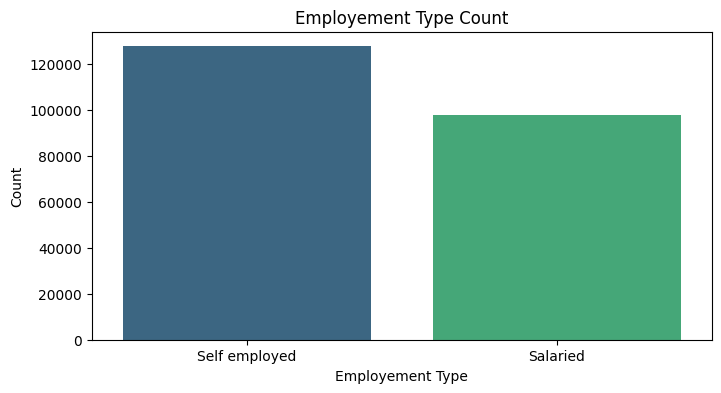

In [6]:
# Count ofEMPLOYMENT_TYPE
empl_type = df['EMPLOYMENT_TYPE'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=empl_type.index, y=empl_type.values, palette='viridis')
plt.title('Employement Type Count')
plt.xlabel('Employement Type')
plt.ylabel('Count')
plt.show()

In [7]:
# as there are lesser missing values so filling this values
df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].fillna(method = 'bfill')

In [8]:
# Convert dates to datetime
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'], errors='coerce', dayfirst=True)
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'], errors='coerce', dayfirst=True)

# Convert categorical variables
df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].astype('category')
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].astype('category')

In [9]:
df.select_dtypes(include=['category']).nunique()

EMPLOYMENT_TYPE                   2
PERFORM_CNS_SCORE_DESCRIPTION    20
dtype: int64

In [10]:
df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [11]:
df = df.replace({'PERFORM_CNS_SCORE_DESCRIPTION':{'C-Very Low Risk':'Low', 'A-Very Low Risk':'Low',
                                                       'B-Very Low Risk':'Low', 'D-Very Low Risk':'Low',
                                                       'F-Low Risk':'Low', 'E-Low Risk':'Low', 'G-Low Risk':'Low',
                                                       'H-Medium Risk': 'Medium', 'I-Medium Risk': 'Medium',
                                                       'J-High Risk':'High', 'K-High Risk':'High','L-Very High Risk':'Very High',
                                                       'M-Very High Risk':'Very High','Not Scored: More than 50 active Accounts found':'Not Scored',
                                                       'Not Scored: Only a Guarantor':'Not Scored','Not Scored: Not Enough Info available on the customer':'Not Scored',
                                                        'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored','Not Scored: No Updates available in last 36 months':'Not Scored',
                                                       'Not Scored: Sufficient History Not Available':'Not Scored', 'No Bureau History Available':'Not Scored'
                                                       }})
df.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

Not Scored    129785
Low            69022
Medium         12412
High           12025
Very High       9910
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

#### We will convert the variables 'AVERAGE_ACCT_AGE' and 'CREDIT_HISTORY_LENGTH' in number of months from its present format.

In [12]:
df['AVERAGE_ACCT_AGE']=df['AVERAGE_ACCT_AGE'].map(lambda x : re.sub("[^0-9]+"," ",x))
df['AVERAGE_ACCT_AGE']=df['AVERAGE_ACCT_AGE'].str.split(" ",expand=True)[0].astype(int)*12+df['AVERAGE_ACCT_AGE'].str.split(" ",expand=True)[1].astype(int)

df['CREDIT_HISTORY_LENGTH']=df['CREDIT_HISTORY_LENGTH'].map(lambda x : re.sub("[^0-9]+"," ",x))
df['CREDIT_HISTORY_LENGTH']=df['CREDIT_HISTORY_LENGTH'].str.split(" ",expand=True)[0].astype(int)*12+df['CREDIT_HISTORY_LENGTH'].str.split(" ",expand=True)[1].astype(int)

#### Next we will use the variables 'DATE_OF_BIRTH' and 'DISBURSAL_DATE' to calculate the age of the customer and the age of the loan respectively.

In [13]:
df['TODAY']=pd.to_datetime(datetime.date.today())

df['AGE']=df['TODAY']-df['DATE_OF_BIRTH']
new = df["AGE"].astype(str).str.split(" ", n = 1, expand = True)
df['AGE']=new[0].astype(int)

df['LOAN_AGE']=df['TODAY']-df['DISBURSAL_DATE']
new = df["LOAN_AGE"].astype(str).str.split(" ", n = 1, expand = True)
df['LOAN_AGE']=new[0].astype(int)

<AxesSubplot:>

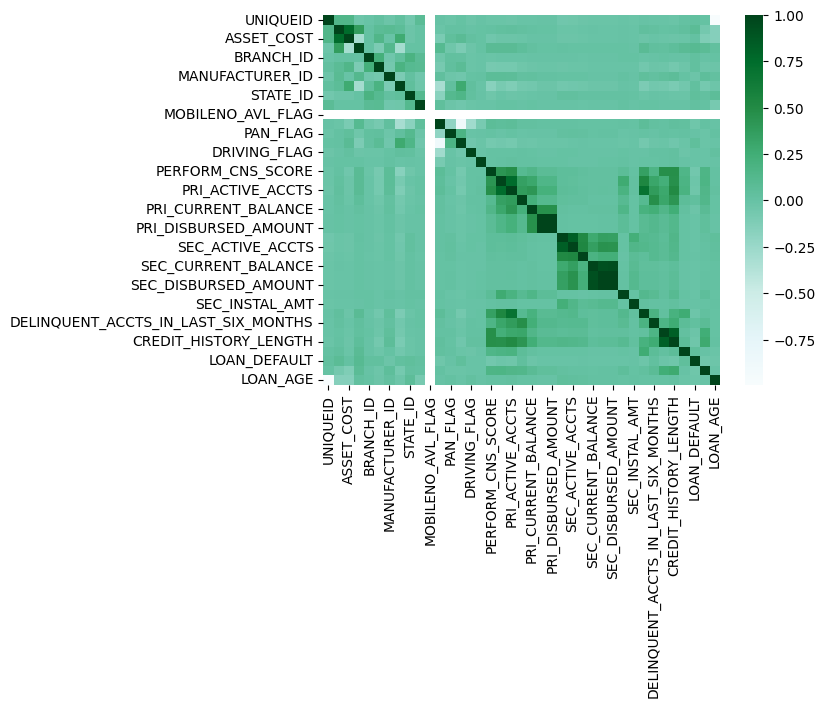

In [14]:
sns.heatmap(df.corr(), cmap='BuGn')

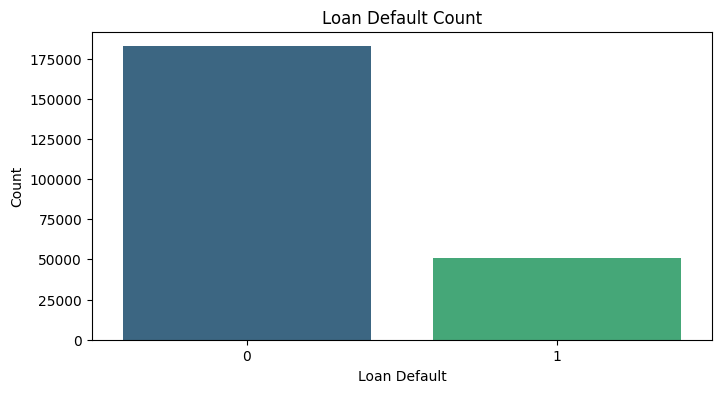

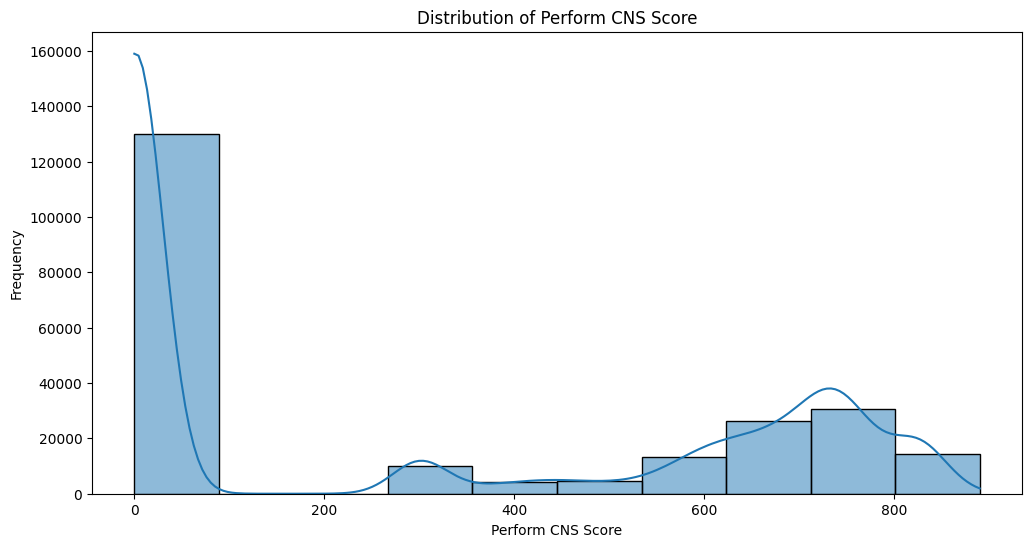

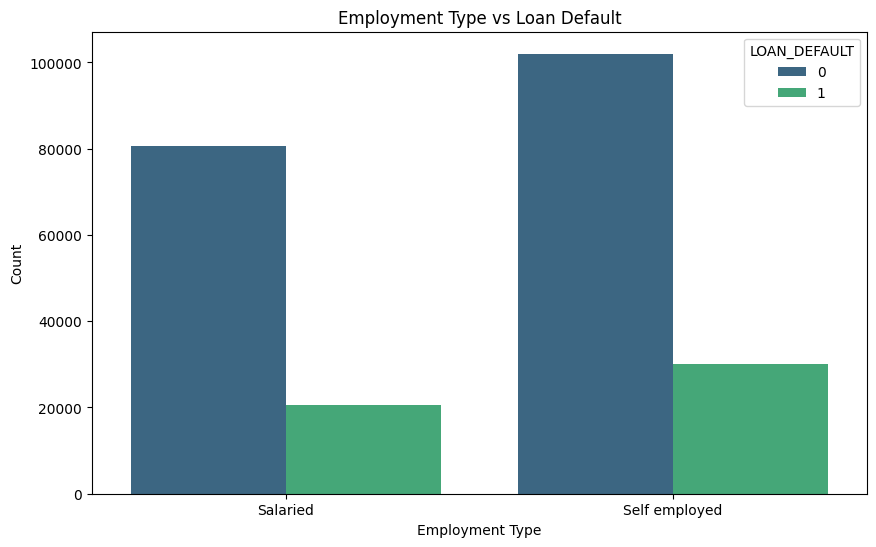

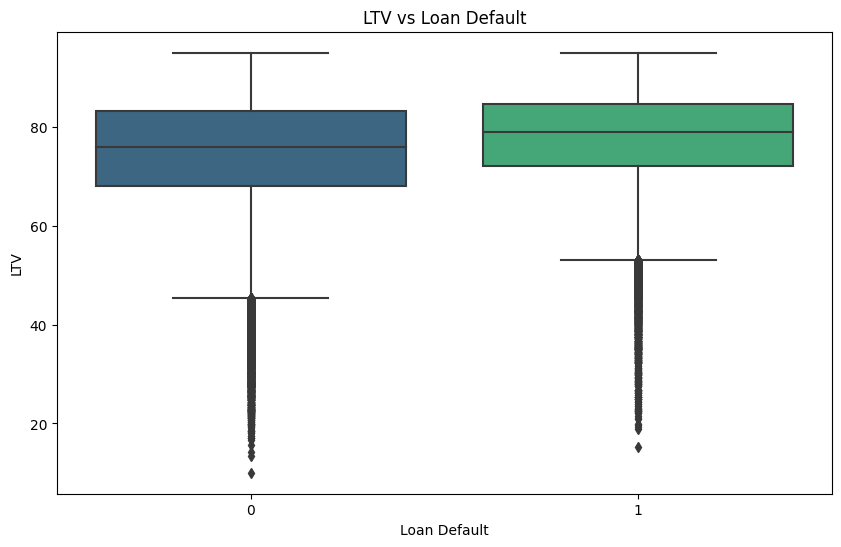

In [15]:
# Count of loan defaults
loan_default_count = df['LOAN_DEFAULT'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=loan_default_count.index, y=loan_default_count.values, palette='viridis')
plt.title('Loan Default Count')
plt.xlabel('Loan Default')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='PERFORM_CNS_SCORE', bins=10, kde=True)
plt.title('Distribution of Perform CNS Score')
plt.xlabel('Perform CNS Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='EMPLOYMENT_TYPE', hue='LOAN_DEFAULT', data=df, palette='viridis')
plt.title('Employment Type vs Loan Default')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='LOAN_DEFAULT', y='LTV', data=df, palette='viridis')
plt.title('LTV vs Loan Default')
plt.xlabel('Loan Default')
plt.ylabel('LTV')
plt.show()

## feature analysis and outliers 

In [33]:
def outlier(df,column):
    
    obsv = len(df[column])
    print("Number of observations in column: ",obsv)

    # calculate summary statistics
    data_mean, data_std = np.mean(df[column]), np.std(df[column])
    print('\nStatistics: \nMean=%.3f, \nStd dev=%.3f\n' % (data_mean, data_std))
    
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
    # identify outliers
    outliers = [x for x in df[column] if x < lower or x > upper]
    print('outliers Identified: %d' % len(outliers))


def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x) 

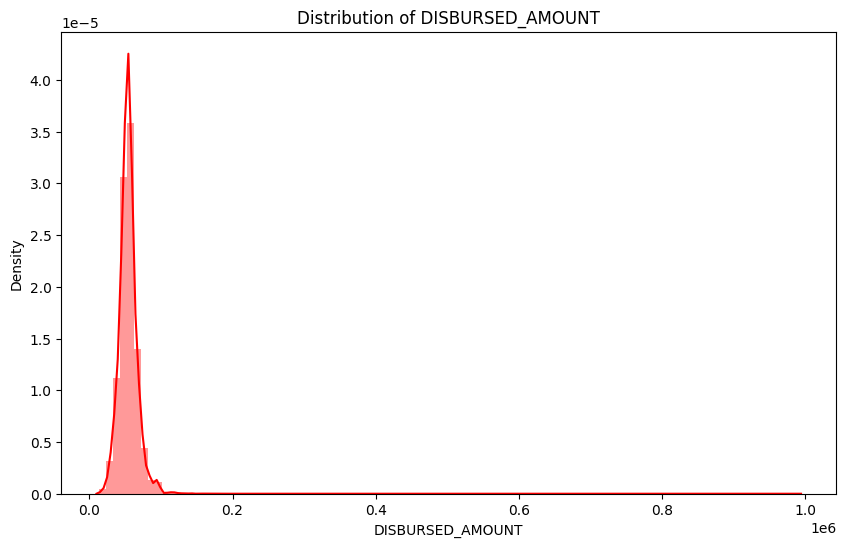

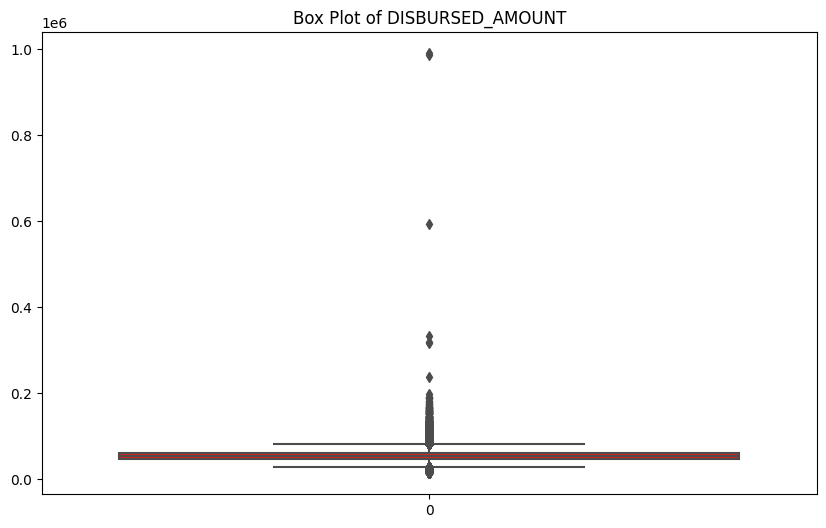

In [17]:
plt.figure(figsize=(10,6))
plt.title("Distribution of %s" % 'DISBURSED_AMOUNT')
sns.distplot(df['DISBURSED_AMOUNT'].dropna(),color='red', kde=True,bins=100)
plt.show()

plt.figure(figsize=(10,6))
plt.title("Box Plot of %s" % "DISBURSED_AMOUNT")
sns.boxplot(df["DISBURSED_AMOUNT"].dropna(),color='red')
plt.show()

In [28]:
outlier(df,"DISBURSED_AMOUNT")

Number of observations in column:  233154

Statistics: 
Mean=54356.994, 
Std dev=12971.286

outliers Identified: 3076


(15443.13446730376, 93270.85258846194)

In [31]:
obsv = len(df['DISBURSED_AMOUNT'])
print("Number of observations in column: ",obsv)

# calculate summary statistics
data_mean, data_std = np.mean(df['DISBURSED_AMOUNT']), np.std(df['DISBURSED_AMOUNT'])
print('\nStatistics: \nMean=%.3f, \nStd dev=%.3f\n' % (data_mean, data_std))

# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in df['DISBURSED_AMOUNT'] if x < lower or x > upper]
print('outliers Identified: %d' % len(outliers))

Number of observations in column:  233154

Statistics: 
Mean=54356.994, 
Std dev=12971.286

outliers Identified: 3076


In [35]:
df["DISBURSED_AMOUNT_new"]= df["DISBURSED_AMOUNT"].apply(impute_outlier)
print("No. of observations in column: ",len(df.DISBURSED_AMOUNT_new))
outlier(df,"DISBURSED_AMOUNT_new")

No. of observations in column:  233154
Number of observations in column:  233154

Statistics: 
Mean=53736.641, 
Std dev=11177.432

outliers Identified: 1680


In [36]:
bin_labels = ['Not Scored','Low', 'Medium', 'High', 'Very High']
df['DISBURSED_AMOUNT_bins'] = pd.qcut(df['DISBURSED_AMOUNT'],
                              q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                              labels=bin_labels)
df['DISBURSED_AMOUNT_bins'].value_counts()

Low           47181
High          46935
Not Scored    46631
Very High     46327
Medium        46080
Name: DISBURSED_AMOUNT_bins, dtype: int64

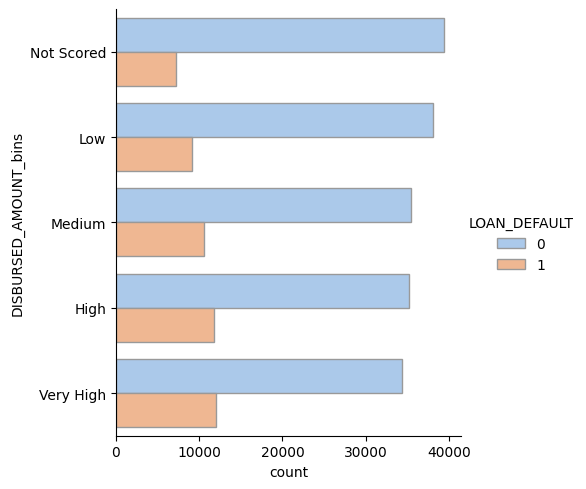

In [37]:
# plt.figure(figsize=(10,50))
sns.catplot(y='DISBURSED_AMOUNT_bins', hue="LOAN_DEFAULT", kind="count",
        palette="pastel", edgecolor=".6",
        data=df);

### asset_cost

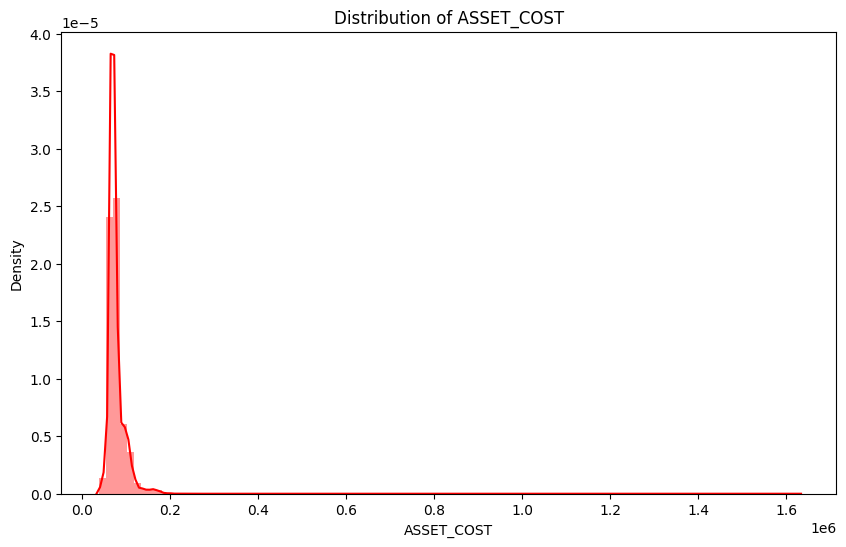

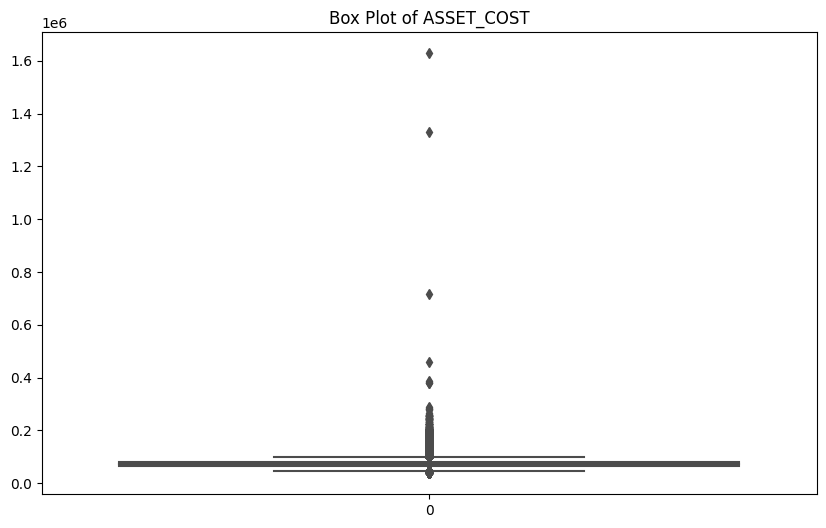

In [38]:
plt.figure(figsize=(10,6))
plt.title("Distribution of %s" % 'ASSET_COST')
sns.distplot(df['ASSET_COST'].dropna(),color='red', kde=True,bins=100)
plt.show()

plt.figure(figsize=(10,6))
plt.title("Box Plot of %s" % "ASSET_COST")
sns.boxplot(df["ASSET_COST"].dropna(),color='red')
plt.show()

In [39]:
outlier(df,"ASSET_COST")

Number of observations in column:  233154

Statistics: 
Mean=75865.068, 
Std dev=18944.741

outliers Identified: 4425


In [40]:
obsv = len(df['ASSET_COST'])
print("Number of observations in column: ",obsv)

# calculate summary statistics
data_mean, data_std = np.mean(df['ASSET_COST']), np.std(df['ASSET_COST'])
print('\nStatistics: \nMean=%.3f, \nStd dev=%.3f\n' % (data_mean, data_std))

# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in df['ASSET_COST'] if x < lower or x > upper]
print('outliers Identified: %d' % len(outliers))


df["ASSET_COST_new"]= df["ASSET_COST"].apply(impute_outlier)
print("No. of observations in column: ",len(df.ASSET_COST_new))
outlier(df,"ASSET_COST_new")

Number of observations in column:  233154

Statistics: 
Mean=75865.068, 
Std dev=18944.741

outliers Identified: 4425
No. of observations in column:  233154
Number of observations in column:  233154

Statistics: 
Mean=74272.681, 
Std dev=14074.345

outliers Identified: 3425


In [41]:
bin_labels = ['Not Scored','Low', 'Medium', 'High', 'Very High']
df['ASSET_COST_bins'] = pd.qcut(df['ASSET_COST'],
                              q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                              labels=bin_labels)
df['ASSET_COST_bins'].value_counts()

Not Scored    46647
Very High     46631
Medium        46629
High          46628
Low           46619
Name: ASSET_COST_bins, dtype: int64

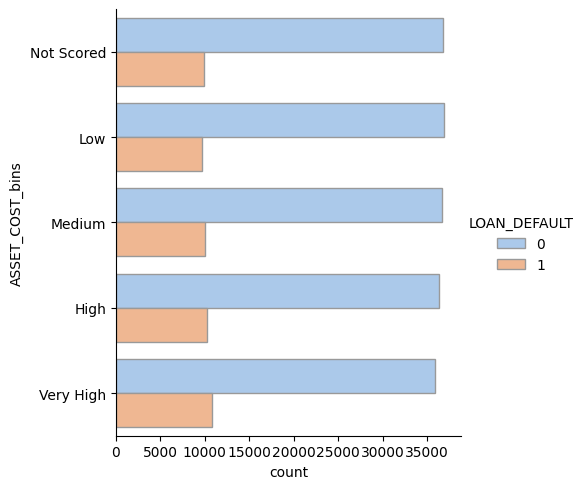

In [42]:
sns.catplot(y='ASSET_COST_bins', hue="LOAN_DEFAULT", kind="count",
        palette="pastel", edgecolor=".6",
        data=df);

In [43]:
# LTV :: Loan to Value of the asset

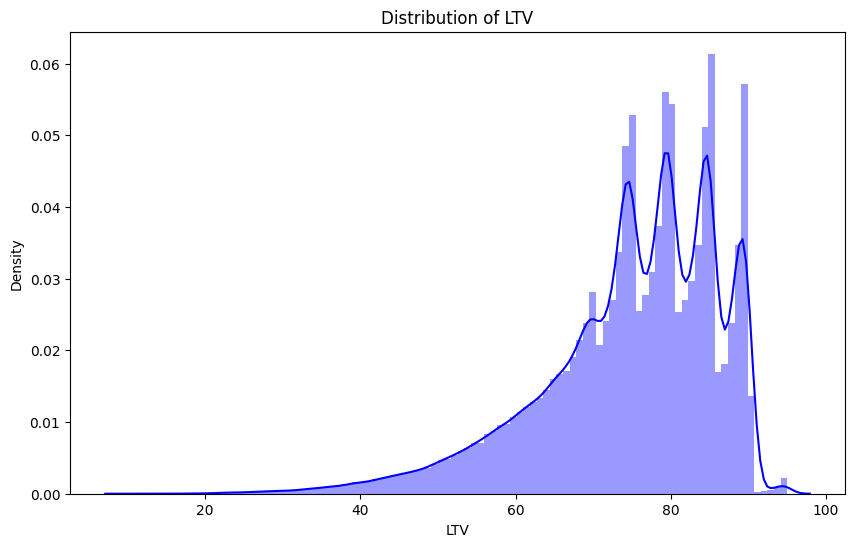

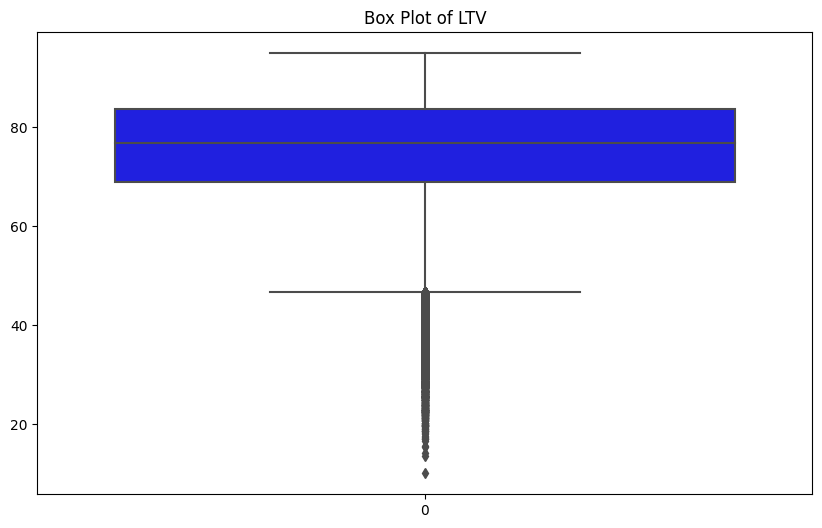

In [44]:
plt.figure(figsize=(10,6))
plt.title("Distribution of %s" % 'LTV')
sns.distplot(df['LTV'].dropna(),color='blue', kde=True,bins=100)
plt.show()

plt.figure(figsize=(10,6))
plt.title("Box Plot of %s" % 'LTV')
sns.boxplot(df['LTV'].dropna(),color='blue')
plt.show()

In [45]:
outlier(df,"LTV")

Number of observations in column:  233154

Statistics: 
Mean=74.747, 
Std dev=11.457

outliers Identified: 2745


In [46]:
obsv = len(df['LTV'])
print("Number of observations in column: ",obsv)

# calculate summary statistics
data_mean, data_std = np.mean(df['LTV']), np.std(df['LTV'])
print('\nStatistics: \nMean=%.3f, \nStd dev=%.3f\n' % (data_mean, data_std))

# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in df['LTV'] if x < lower or x > upper]
print('outliers Identified: %d' % len(outliers))

df["LTV_new"]= df["LTV"].apply(impute_outlier)
print("No. of observations in column: ",len(df.LTV))
outlier(df,"LTV_new")

Number of observations in column:  233154

Statistics: 
Mean=74.747, 
Std dev=11.457

outliers Identified: 2745
No. of observations in column:  233154
Number of observations in column:  233154

Statistics: 
Mean=75.223, 
Std dev=10.558

outliers Identified: 1435


In [47]:
bin_labels = ['Not Scored','Low', 'Medium', 'High', 'Very High']
df['LTV_bins'] = pd.qcut(df['LTV'],
                              q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                              labels=bin_labels)
df['LTV_bins'].value_counts()

Low           46712
Medium        46660
Not Scored    46655
Very High     46580
High          46547
Name: LTV_bins, dtype: int64

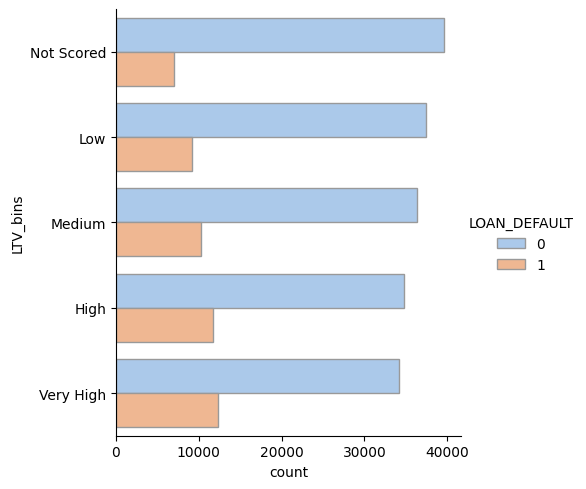

In [48]:
sns.catplot(y='LTV_bins', hue="LOAN_DEFAULT", kind="count",
        palette="pastel", edgecolor=".6",
        data=df);

In [49]:
# PERFORM_CNS_SCORE :: Bureau Score

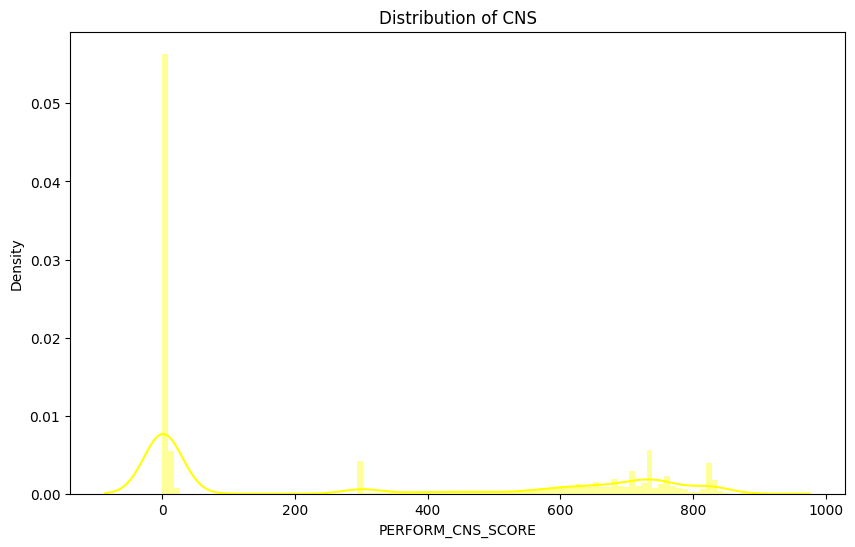

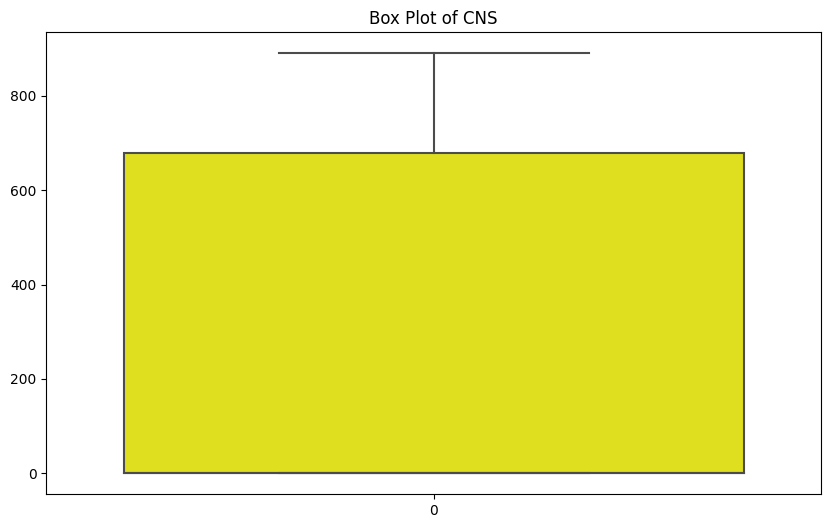

In [50]:
plt.figure(figsize=(10,6))
plt.title("Distribution of %s" % 'CNS')
sns.distplot(df['PERFORM_CNS_SCORE'].dropna(),color='yellow', kde=True,bins=100)
plt.show()

plt.figure(figsize=(10,6))
plt.title("Box Plot of %s" % 'CNS')
sns.boxplot(df['PERFORM_CNS_SCORE'].dropna(),color='yellow')
plt.show()

In [51]:
outlier(df,"PERFORM_CNS_SCORE")

Number of observations in column:  233154

Statistics: 
Mean=289.463, 
Std dev=338.374

outliers Identified: 0


In [52]:
bin_labels = ['Not Scored','Low', 'Medium', 'High', 'Very High']

cut_bins = [-1,10,150, 350, 650, 1000]

df['PERFORM_CNS_SCORE_bins'] = pd.cut(df['PERFORM_CNS_SCORE'],
                              bins=cut_bins,
                              labels=bin_labels)
df['PERFORM_CNS_SCORE_bins'].value_counts()

Not Scored    116950
Very High      65034
High           28425
Low            12835
Medium          9910
Name: PERFORM_CNS_SCORE_bins, dtype: int64

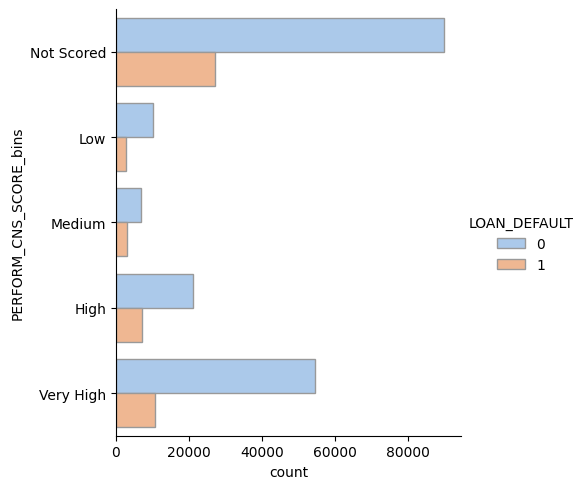

In [53]:
sns.catplot(y='PERFORM_CNS_SCORE_bins', hue="LOAN_DEFAULT", kind="count",
        palette="pastel", edgecolor=".6",
        data=df);

In [54]:
# PRI_NO_OF_ACCTS

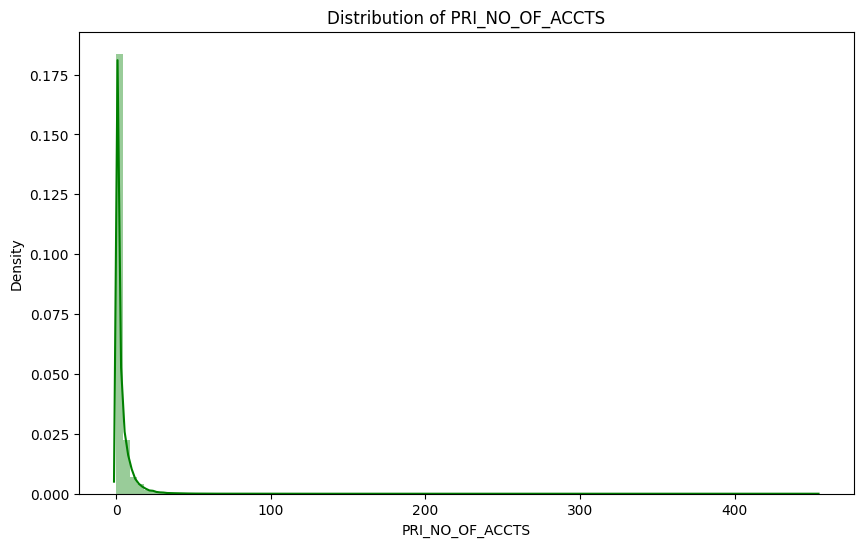

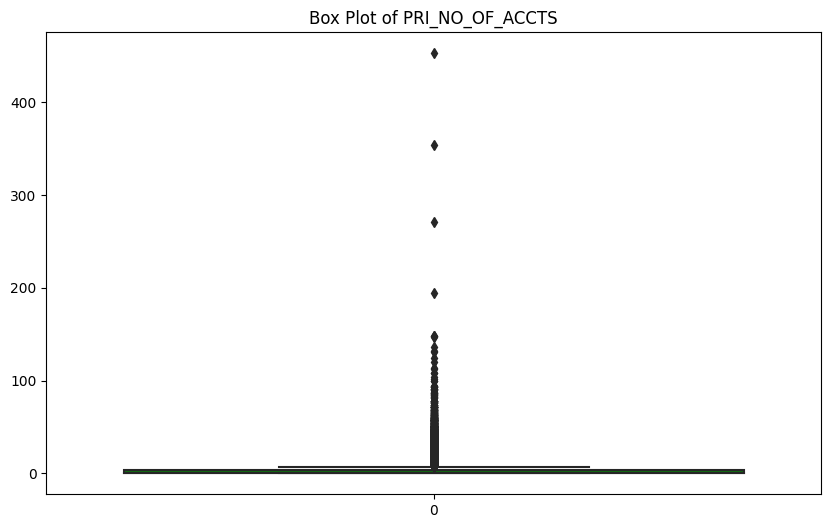

In [55]:
plt.figure(figsize=(10,6))
plt.title("Distribution of %s" % 'PRI_NO_OF_ACCTS')
sns.distplot(df['PRI_NO_OF_ACCTS'].dropna(),color='green', kde=True,bins=100)
plt.show()

plt.figure(figsize=(10,6))
plt.title("Box Plot of %s" % 'PRI_NO_OF_ACCTS')
sns.boxplot(df['PRI_NO_OF_ACCTS'].dropna(),color='green')
plt.show()

In [56]:
outlier(df,"PRI_NO_OF_ACCTS")

Number of observations in column:  233154

Statistics: 
Mean=2.441, 
Std dev=5.217

outliers Identified: 4119


In [57]:
obsv = len(df['PRI_NO_OF_ACCTS'])
print("Number of observations in column: ",obsv)

# calculate summary statistics
data_mean, data_std = np.mean(df['PRI_NO_OF_ACCTS']), np.std(df['PRI_NO_OF_ACCTS'])
print('\nStatistics: \nMean=%.3f, \nStd dev=%.3f\n' % (data_mean, data_std))

# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in df['PRI_NO_OF_ACCTS'] if x < lower or x > upper]
print('outliers Identified: %d' % len(outliers))

df["PRI_NO_OF_ACCTS_new"]= df["PRI_NO_OF_ACCTS"].apply(impute_outlier)
print("No. of observations in column: ",len(df.PRI_NO_OF_ACCTS))
outlier(df,"PRI_NO_OF_ACCTS_new")

Number of observations in column:  233154

Statistics: 
Mean=2.441, 
Std dev=5.217

outliers Identified: 4119
No. of observations in column:  233154
Number of observations in column:  233154

Statistics: 
Mean=1.980, 
Std dev=3.269

outliers Identified: 7064


In [58]:
bin_labels = ["One",'More than One']
cut_bins = [-1,1, 1000]

df['PRI_NO_OF_ACCTS_bins'] = pd.cut(df['PRI_NO_OF_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
df['PRI_NO_OF_ACCTS_bins'].value_counts()

One              151928
More than One     81226
Name: PRI_NO_OF_ACCTS_bins, dtype: int64

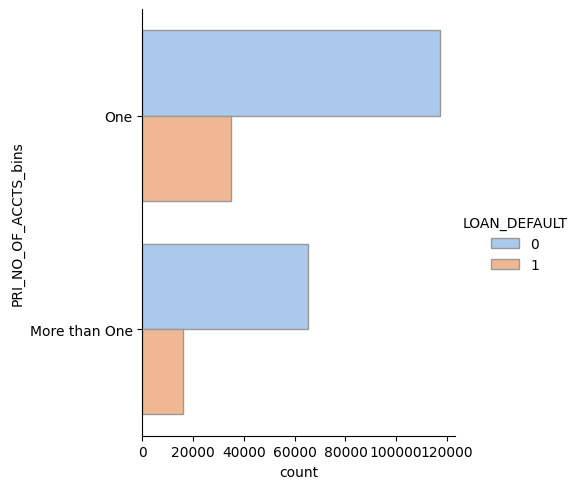

In [59]:
sns.catplot(y='PRI_NO_OF_ACCTS_bins', hue="LOAN_DEFAULT", kind="count",
        palette="pastel", edgecolor=".6",
        data=df);

In [60]:
#PRI_OVERDUE_ACCTS

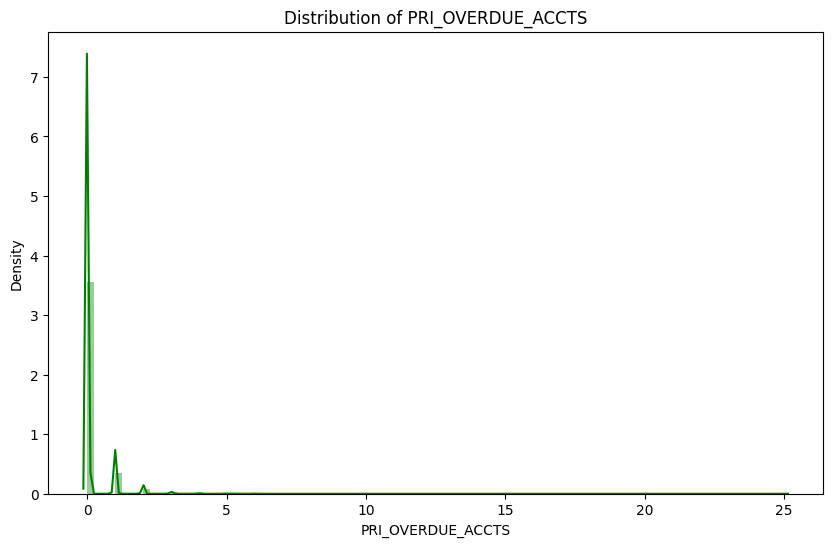

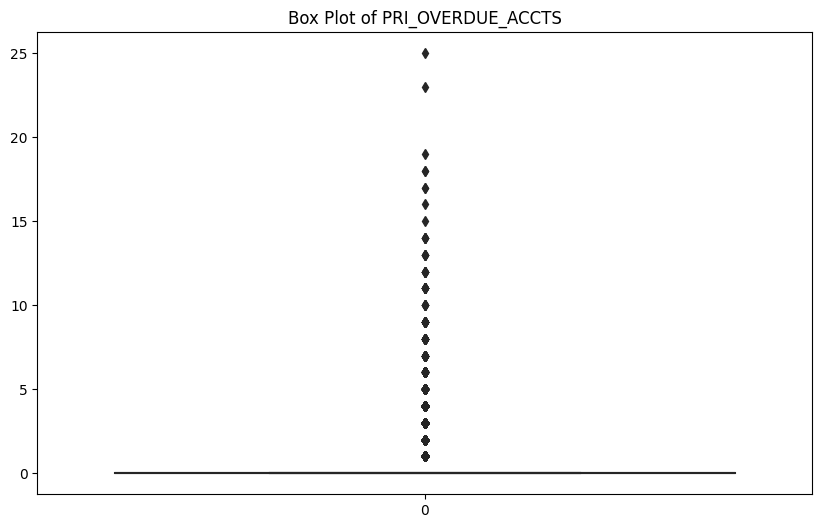

In [61]:
plt.figure(figsize=(10,6))
plt.title("Distribution of %s" % 'PRI_OVERDUE_ACCTS')
sns.distplot(df['PRI_OVERDUE_ACCTS'].dropna(),color='green', kde=True,bins=100)
plt.show()

plt.figure(figsize=(10,6))
plt.title("Box Plot of %s" % 'PRI_OVERDUE_ACCTS')
sns.boxplot(df['PRI_OVERDUE_ACCTS'].dropna(),color='green')
plt.show()

In [62]:
outlier(df,"PRI_OVERDUE_ACCTS")

Number of observations in column:  233154

Statistics: 
Mean=0.157, 
Std dev=0.549

outliers Identified: 6305


In [63]:
obsv = len(df['PRI_OVERDUE_ACCTS'])
print("Number of observations in column: ",obsv)

# calculate summary statistics
data_mean, data_std = np.mean(df['PRI_OVERDUE_ACCTS']), np.std(df['PRI_OVERDUE_ACCTS'])
print('\nStatistics: \nMean=%.3f, \nStd dev=%.3f\n' % (data_mean, data_std))

# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in df['PRI_OVERDUE_ACCTS'] if x < lower or x > upper]
print('outliers Identified: %d' % len(outliers))

df["PRI_OVERDUE_ACCTS_new"]= df["PRI_OVERDUE_ACCTS"].apply(impute_outlier)
print("No. of observations in column: ",len(df.PRI_OVERDUE_ACCTS))
outlier(df,"PRI_OVERDUE_ACCTS_new")

Number of observations in column:  233154

Statistics: 
Mean=0.157, 
Std dev=0.549

outliers Identified: 6305
No. of observations in column:  233154
Number of observations in column:  233154

Statistics: 
Mean=0.090, 
Std dev=0.280

outliers Identified: 19970


In [64]:
bin_labels = ["None",'One (or more)']
cut_bins = [-1,0, 1000]

df['PRI_OVERDUE_ACCTS_bins'] = pd.cut(df['PRI_OVERDUE_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
df['PRI_OVERDUE_ACCTS_bins'].value_counts()

None             206879
One (or more)     26275
Name: PRI_OVERDUE_ACCTS_bins, dtype: int64

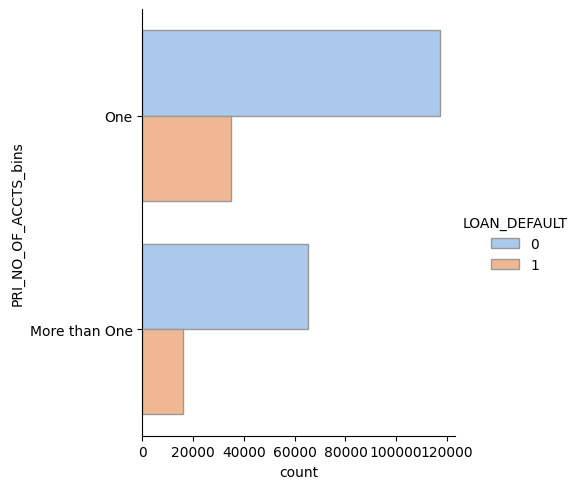

In [65]:
sns.catplot(y='PRI_NO_OF_ACCTS_bins', hue="LOAN_DEFAULT", kind="count",
        palette="pastel", edgecolor=".6",
        data=df);

## Feature Selection

In [66]:
df = df.drop([ 'DATE_OF_BIRTH' , 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 
              'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)

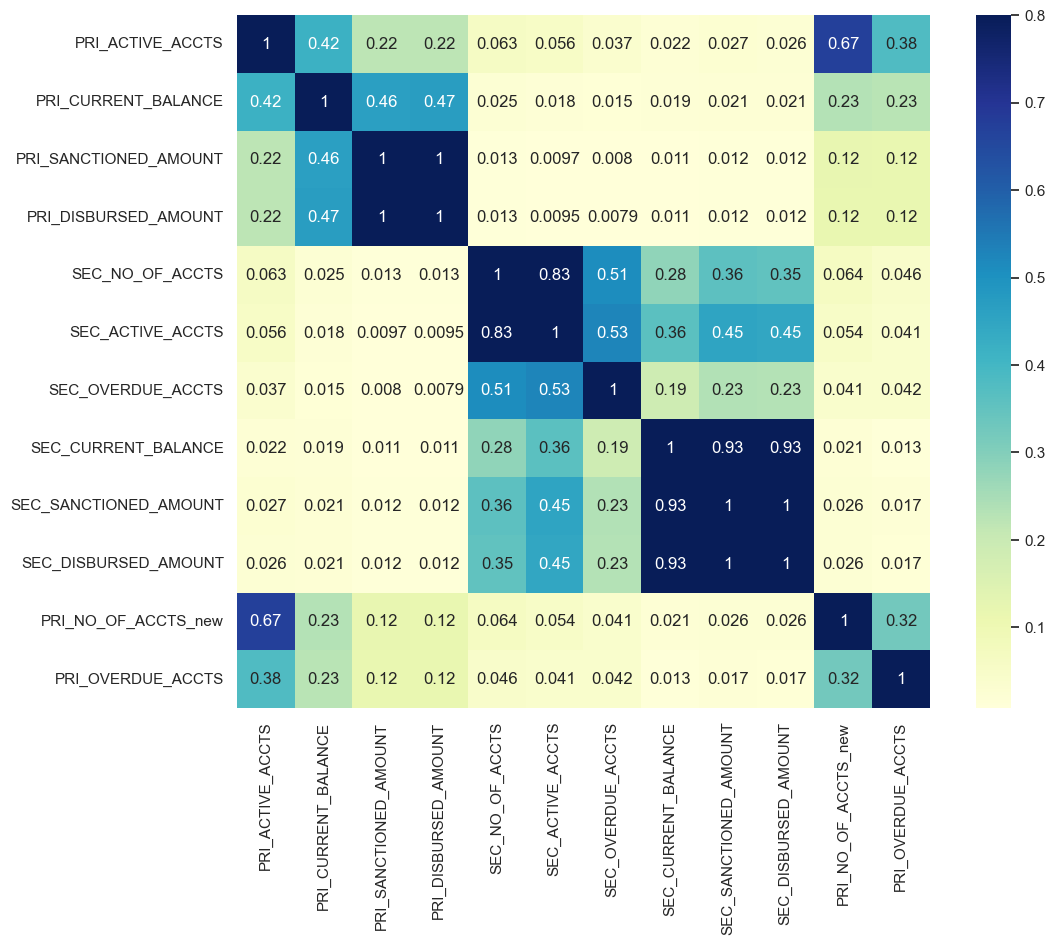

In [67]:
#Highly Correlated
sns.set()

cols = df[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 
              'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
              'SEC_DISBURSED_AMOUNT',  'PRI_NO_OF_ACCTS_new', 'PRI_OVERDUE_ACCTS']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

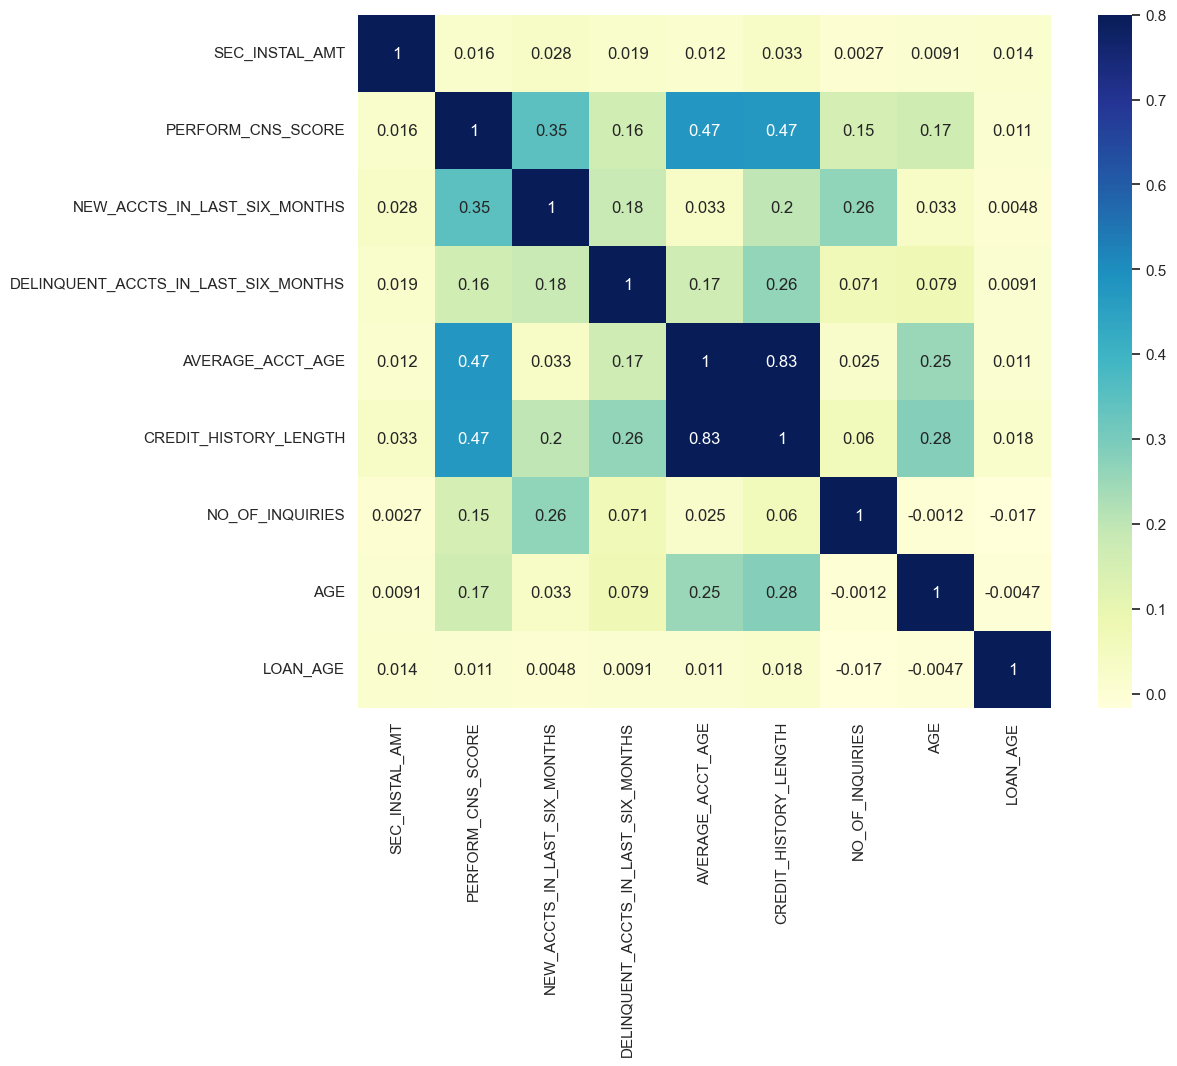

In [70]:
#Highly Correlated
sns.set()

cols = df[['SEC_INSTAL_AMT', 'PERFORM_CNS_SCORE','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
              'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES','AGE', 'LOAN_AGE']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

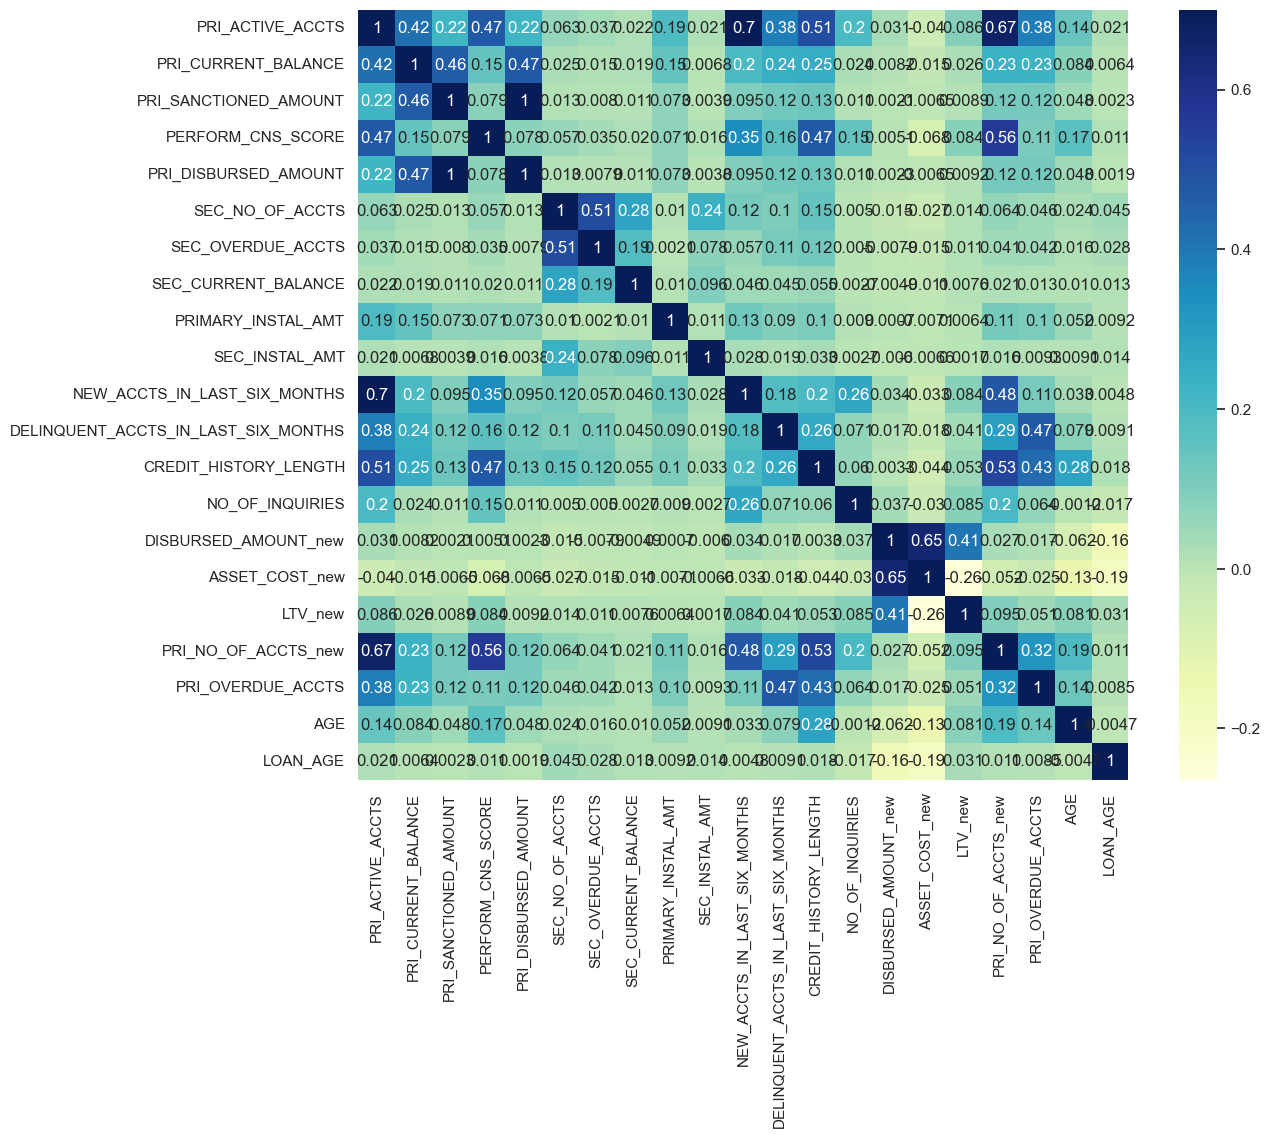

In [71]:
#Highly Correlated
sns.set()

cols = df[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PERFORM_CNS_SCORE',
              'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
              'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
              'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
              'DISBURSED_AMOUNT_new','ASSET_COST_new','LTV_new','PRI_NO_OF_ACCTS_new','PRI_OVERDUE_ACCTS','AGE', 'LOAN_AGE']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corr, annot=True, vmax=.7, square=True,cmap = 'YlGnBu');

In [ ]:
## Preparing Datasets 1) Binned Variables 2) Continous variables

In [72]:
df_con = df[['EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
                   'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 
                   'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 
                   'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 
                   'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
                   'LOAN_DEFAULT', 'DISBURSED_AMOUNT_new', 'ASSET_COST_new', 
                   'LTV_new', 'PRI_OVERDUE_ACCTS','AGE', 'LOAN_AGE']]

In [73]:
df_bin = df [['UNIQUEID', 'EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 
                    'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 
                    'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE',
                    'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
                    'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
                    'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT',
                    'DISBURSED_AMOUNT_bins', 'ASSET_COST_bins', 'LTV_bins',
                    'PERFORM_CNS_SCORE_bins', 'PRI_NO_OF_ACCTS_bins', 'PRI_OVERDUE_ACCTS_bins', 'AGE', 'LOAN_AGE']]

# Standardization of data


In [75]:
from sklearn.preprocessing import StandardScaler
scaler_data = StandardScaler()

def scaleColumns(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(scaler_data.fit_transform(pd.DataFrame(df_con[col])),columns=[col])

    return df

In [76]:
scaled_df = scaleColumns(df_con,['PERFORM_CNS_SCORE','PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 
                                 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 
                                 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
                                 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 
                                 'NO_OF_INQUIRIES', 'DISBURSED_AMOUNT_new',
                                 'ASSET_COST_new', 'LTV_new', 'AGE', 'LOAN_AGE'])

scaled_df.head()

,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_ACTIVE_ACCTS,...,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,DISBURSED_AMOUNT_new,ASSET_COST_new,LTV_new,PRI_OVERDUE_ACCTS,AGE,LOAN_AGE
0,Salaried,1,1,0,0,0,0,-0.855453,Not Scored,-0.535617,...,-0.253566,-0.568640,-0.292450,0,-0.282591,-1.127774,1.356981,0,0.026250,1.880044
1,Self employed,1,1,0,0,0,0,0.911822,Medium,-0.020549,...,2.347632,0.236085,-0.292450,1,-0.589728,-0.619757,-0.188716,1,-0.134554,-0.094516
2,Self employed,1,1,0,0,0,0,-0.855453,Not Scored,-0.535617,...,-0.253566,-0.568640,-0.292450,0,-0.041033,-0.917462,1.364558,0,-0.141243,1.953176
3,Self employed,1,1,0,0,0,0,0.045917,Very High,-0.535617,...,-0.253566,-0.043819,1.122986,1,0.337856,-0.579756,1.255639,0,-0.991244,-1.191493
4,Self employed,1,1,0,0,0,0,-0.855453,Not Scored,-0.535617,...,-0.253566,-0.568640,1.122986,1,-0.121552,-0.992777,1.247115,0,0.643267,-0.094516


In [77]:
df_dummy = pd.get_dummies(scaled_df, prefix_sep='_', drop_first=True)
df_dummy.head()

,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,...,ASSET_COST_new,LTV_new,PRI_OVERDUE_ACCTS,AGE,LOAN_AGE,EMPLOYMENT_TYPE_Self employed,PERFORM_CNS_SCORE_DESCRIPTION_Low,PERFORM_CNS_SCORE_DESCRIPTION_Medium,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored,PERFORM_CNS_SCORE_DESCRIPTION_Very High
0,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,...,-1.127774,1.356981,0,0.026250,1.880044,0,0,0,1,0
1,1,1,0,0,0,0,0.911822,-0.020549,-0.146773,-0.070599,...,-0.619757,-0.188716,1,-0.134554,-0.094516,1,0,1,0,0
2,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,...,-0.917462,1.364558,0,-0.141243,1.953176,1,0,0,1,0
3,1,1,0,0,0,0,0.045917,-0.535617,-0.176064,-0.091711,...,-0.579756,1.255639,0,-0.991244,-1.191493,1,0,0,0,1
4,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,...,-0.992777,1.247115,0,0.643267,-0.094516,1,0,0,1,0


In [78]:
y = df_dummy[['LOAN_DEFAULT']]
X= df_dummy.loc[:, df_dummy.columns != 'LOAN_DEFAULT']
X.shape

(233154, 29)

In [79]:
np.any(np.isnan(X))

False

In [80]:
X = X.fillna(0)
X.shape

(233154, 29)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Model training 

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.ensemble import AdaBoostClassifier

### Logistic Regression

In [88]:

logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36461    44]
 [10086    40]]
78.0


In [89]:
print("Accuracy of model ",accuracy_score(y_test, logpred))
print("F1 Score ",f1_score(y_test, logpred))
print("Recall Score ",recall_score(y_test, logpred))
print("precision_score ",precision_score(y_test, logpred))

# print("Balanced Accuracy Score ",balanced_accuracy_score(y_test, logpred))

Accuracy of model  0.7827625399412408
F1 Score  0.007835455435847209
Recall Score  0.003950227138060439
precision_score  0.47619047619047616


In [90]:
## Random Forest

In [91]:
# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[35176  1329]
 [ 9443   683]]
77.0


In [92]:
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("precision_score ",precision_score(y_test, rfc_pred))

Accuracy of model  0.7689948746542
F1 Score  0.11253913330037897
Recall Score  0.06745012838238199
precision_score  0.3394632206759443


In [93]:
## adaboost

In [94]:
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
clf.fit(X_train, y_train)

clf_pred = clf.predict(X_test)
print(confusion_matrix(y_test, clf_pred))
print(round(accuracy_score(y_test, clf_pred),2)*100)

[[36484    21]
 [10098    28]]
78.0


In [95]:
print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("precision_score",precision_score(y_test, rfc_pred))

Accuracy of model  0.7689948746542
F1 Score  0.11253913330037897
Recall Score  0.06745012838238199
precision_score 0.3394632206759443


In [96]:
## XG Boost

In [97]:
# train model
xgb = XGBClassifier().fit(X_train, y_train)

# predict on test set
xgb_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, xgb_pred))
print(round(accuracy_score(y_test, xgb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[36239   266]
 [ 9897   229]]
78.0


In [98]:
print("Accuracy of model ",accuracy_score(y_test, xgb_pred))
print("F1 Score ",f1_score(y_test, xgb_pred))
print("Recall Score ",recall_score(y_test, xgb_pred))
print("precision_score",precision_score(y_test, xgb_pred))

Accuracy of model  0.7820548562115331
F1 Score  0.04312211656152904
Recall Score  0.02261505036539601
precision_score 0.4626262626262626


In [99]:
## Dealing with Imbalanced data using SMOTE

In [102]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [103]:
# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print("Accuracy of model ",accuracy_score(y_test, rfc_pred))
print("F1 Score ",f1_score(y_test, rfc_pred))
print("Recall Score ",recall_score(y_test, rfc_pred))
print("Precision Score ",precision_score(y_test, rfc_pred))

[[38470  7275]
 [ 9760  2784]]
71.0
Accuracy of model  0.707749318053149
F1 Score  0.24633898155112152
Recall Score  0.22193877551020408
Precision Score  0.27676707426185504


In [ ]:
# train model
adb = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)

# predict on test set
adb_pred = adb.predict(X_test)
print(confusion_matrix(y_test, adb_pred))
print(round(accuracy_score(y_test, adb_pred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

print("Accuracy of model ",accuracy_score(y_test, adb_pred))
print("F1 Score ",f1_score(y_test, adb_pred))
print("Recall Score ",recall_score(y_test, adb_pred))
print("Precision Score ",precision_score(y_test, adb_pred))